In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian_exploration import bayesian_exploration

# test function
from xopt.evaluators import test_TNK


In [2]:
# Get VOCS
VOCS = test_TNK.VOCS
VOCS['objectives'] = {'y1' : None}

# add reference point
ref = torch.tensor((1.4, 1.4))

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# Run
init_x = torch.tensor([[0.9, 0.9], [0.6, 0.6]])
results = bayesian_exploration(VOCS, EVALUATE,
                                n_initial_samples=5,
                                initial_x=None,
                             use_gpu=False,
                             sigma=torch.eye(2) * 0.01,
                             n_steps=20, verbose=True)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': None}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
No executor given. Running in serial mode.
tensor([[1.9228, 1.7342]], dtype=torch.float64)
tensor([[1.5051, 1.5754]], dtype=torch.float64)
tensor([[1.1718, 1.4378]], dtype=torch.float64)
tensor([[0.9617, 1.2277]], dtype=torch.float64)
tensor([[0.8316, 1.1090]], dtype=torch.float64)
tensor([[0.7398, 1.1093]], dtype=torch.float64)
tensor([[0.6652, 1.1416]], dtype=torch.float64)
tensor([[0.5898, 1.1616]], dtype=torch.float64)
tensor([[0.5187, 1.1032]], dtype=torch.float64)
tensor([[0.4811, 1.0340]], dtype=torch.float64)
tensor([[0.4749, 0.9657]], dtype=torch.float64)
tensor([[0.4989, 0.9083]], dtype=torch.float64

['inputs', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model']


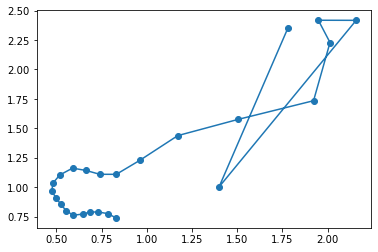

In [4]:
fig, ax = plt.subplots()
print(list(results.keys()))
ax.plot(results['inputs'][:, 0], results['inputs'][:, 1], '-o')

plt.show()